In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
sheets = ['Screen', 'Demographics', 'Demographics(1)', 
          'medhistory', 'medhistory(1)', 'ACQ']
data_df_dict = {}
for sheet in sheets:
    data_df_tmp = pd.read_excel('Asthma study 2019.xlsx', 
                                sheet_name=sheet, 
                                index_col=0)
    data_df_dict[sheet] = data_df_tmp

In [3]:
screen = pd.DataFrame(data_df_dict['Screen']).reset_index()
acq_1 = pd.DataFrame(data_df_dict['ACQ']).reset_index()
demographics = pd.DataFrame(data_df_dict['Demographics']).reset_index()
demographics_1 = pd.DataFrame(data_df_dict['Demographics(1)']).reset_index()
medhistory = pd.DataFrame(data_df_dict['medhistory']).reset_index()
medhistory_1 = pd.DataFrame(data_df_dict['medhistory(1)']).reset_index()

In [4]:
screen_filter = screen.dropna(subset=['infconsent', '18+'])
#Removes NaN

In [5]:
screen_filter = screen_filter.loc[~((screen_filter['eos300'] == 0))]
screen_filter = screen_filter.dropna(subset=['eos300'])
#Filtered out any 0 or NaN in eos300
print(screen_filter.shape)

(197, 10)


In [6]:
screen_id = screen_filter['id'].tolist()
acq_id = acq_1['id'].tolist()
print(len(set(screen_id) & set(acq_id)))
#only 85 matches between the screened patients and the ACQ sheet

85


In [7]:
merged_df = acq_1.merge(screen_filter, how = 'inner', on = 'id')
merged_df.shape

(85, 20)

In [8]:
full_data = merged_df.drop(columns=['infconsent', '18+', 'eos300', 'eos150', 'sputum'])
#Clinic 1 didn't keep track of their dates accuratley which is why dates include 1900 when screening occurred in 2017

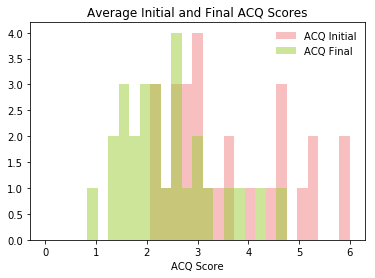

In [9]:
from matplotlib import pyplot

full_data_start_mean = full_data.groupby(['clinic'])['acq'].mean()
full_data_end_mean = full_data.groupby(['clinic'])['acq5'].mean()

bins = np.linspace(0,6, 30)

pyplot.hist(full_data_start_mean, bins, alpha=0.5, label='ACQ Initial', color='lightcoral')
pyplot.hist(full_data_end_mean, bins, alpha=0.5, label='ACQ Final', color='yellowgreen')
pyplot.xlabel('ACQ Score')
pyplot.title("Average Initial and Final ACQ Scores")
pyplot.legend(loc='upper right')
pyplot.legend(frameon=False)
pyplot.show()
#Comparison between first and last ACQ score
#There is a general decrease in ACQ

In [19]:
data = merged_df.drop(columns=['infconsent', '18+', 'eos300', 'eos150', 'sputum'])
#Clinic 1 has entered in date data incorrectly with 1900
data

,id,date_x,acq,date2,acq2,date3,acq3,date4,acq4,date5,acq5,date_y,clinic,acq-screen,result
0,122,1900-01-01,3.666667,1900-01-02,2.200000,1900-01-03,2.420000,1900-01-04,2.420000,1900-01-05,2.178000,2017-10-26,1,4.833333,NaN
1,129,1900-01-01,1.833333,1900-01-02,0.366667,1900-01-03,0.403333,2018-11-28,0.484000,2019-02-07,0.435600,2019-07-23,1,1.333333,n
2,120,1900-01-01,3.500000,1900-01-02,3.850000,1900-02-02,4.235000,1900-01-04,5.082000,2018-08-26,3.557400,2018-09-04,1,4.666667,NaN
3,127,1900-01-01,6.000000,1900-01-22,1.800000,1900-01-03,1.980000,2018-07-16,1.584000,2018-09-14,1.267200,2018-07-15,1,4.166667,NaN
4,123,1900-01-01,1.500000,1900-01-02,0.600000,1900-01-03,0.600000,1900-01-04,0.480000,1900-01-05,0.528000,2019-09-17,1,3.166667,NaN
5,119,1900-01-01,1.666667,1900-01-02,0.666667,1900-01-03,0.666667,1900-01-04,0.800000,1900-01-05,0.720000,2017-05-20,1,5.000000,NaN
6,101,1900-01-01,1.500000,1900-01-02,0.450000,1900-01-03,0.405000,1900-01-04,0.486000,2019-01-25,0.388800,2019-04-18,1,13.000000,NaN
7,118,1900-01-01,3.333333,1900-01-02,4.333333,1900-01-03,4.766667,1900-01-04,3.813333,1900-01-05,2.669333,2019-09-21,1,1.000000,NaN
8,117,1900-01-01,2.333333,1900-01-02,0.233333,1900-01-03,0.233333,1900-01-04,0.186667,1900-01-05,0.205333,2018-07-20,1,9.000000,NaN
9,100,1900-01-01,5.833333,1900-01-02,5.250000,1900-01-03,5.250000,2019-07-03,5.250000,2019-09-12,4.200000,2017-11-20,1,8.000000,NaN


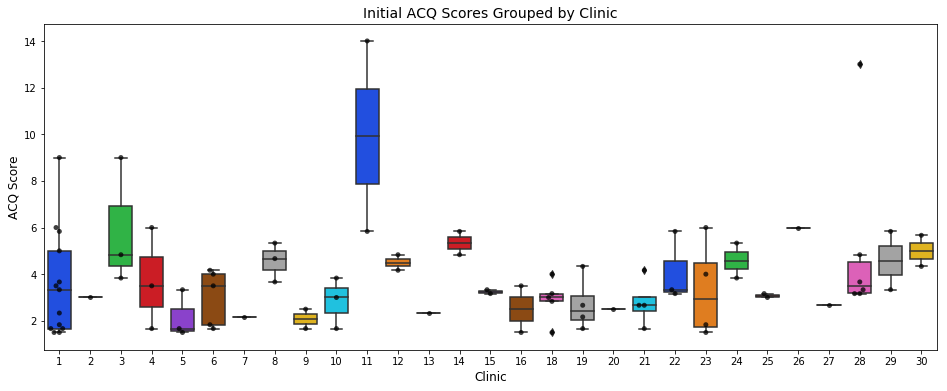

In [14]:
import seaborn as sns

plt.figure(figsize=(16, 6))

bp = sns.boxplot(y='acq', x='clinic', 
                 data=data, 
                 width=0.75,
                 palette="bright")

bp =sns.swarmplot(y='acq', x='clinic',
              data=data, 
              color='black',
              alpha=0.75)

bp.axes.set_title("Initial ACQ Scores Grouped by Clinic",
                    fontsize=14)
 
bp.set_xlabel("Clinic", 
                fontsize=12)
 
bp.set_ylabel("ACQ Score",
                fontsize=12)
 
bp.tick_params(labelsize=10)
#Clinic 11 includes an out of range outlier for ACQ as does clinic 28, 1, and 3

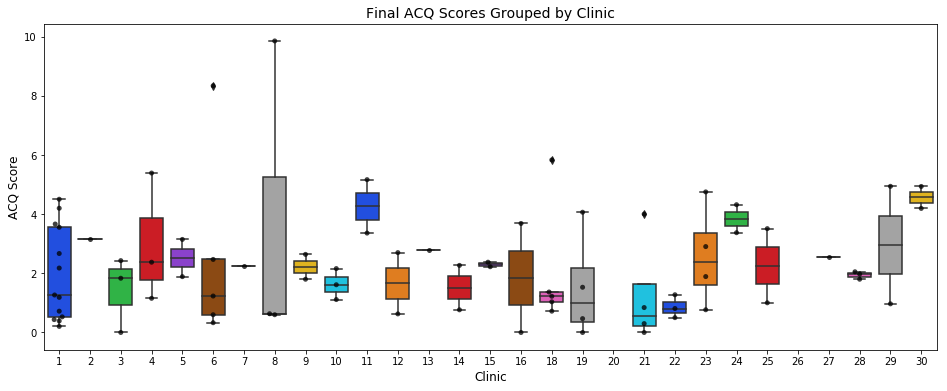

In [24]:
plt.figure(figsize=(16, 6))

bp = sns.boxplot(y='acq5', x='clinic', 
                 data=data, 
                 width=0.75,
                 palette="bright")

bp =sns.swarmplot(y='acq5', x='clinic',
              data=data, 
              color='black',
              alpha=0.75)

bp.axes.set_title("Final ACQ Scores Grouped by Clinic",
                    fontsize=14)
 
bp.set_xlabel("Clinic", 
                fontsize=12)
 
bp.set_ylabel("ACQ Score",
                fontsize=12)
 
bp.tick_params(labelsize=10)
#Oddly enough, clinic 8 where patients were relatively within a similar ACQ range has a rather large outlier
#As does 6 and 18

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

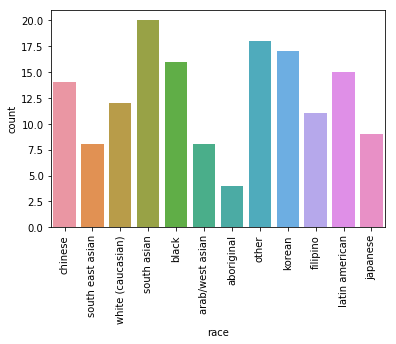

In [25]:
screen_id = screen_filter['id'].tolist()
demographics_1_id = demographics_1['id'].tolist()
#print(len(set(screen_id) & set(demographics_1_id)))
#only 152 matches between the screened patients and the Demographics 1 sheet
demo_acq = demographics_1.merge(screen_filter, how = 'inner', on = 'id')
demo_acq = demo_acq.drop(columns=['infconsent', '18+', 'eos300', 'eos150', 'sputum'])

sns.countplot(x='race', data=demo_acq)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

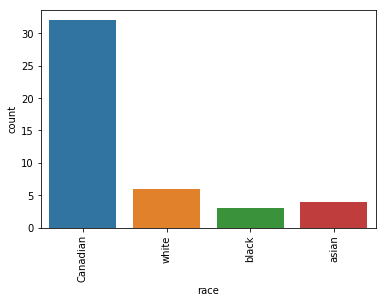

In [26]:
demographics_id = demographics['id'].tolist()
#print(len(set(demographics_1_id) & set(screen_id)))
demo_screen = demographics.merge(screen_filter, how = 'inner', on = 'id')
demo_screen = demo_screen.drop(columns=['infconsent', '18+', 'eos300', 'eos150', 'sputum'])

sns.countplot(x='race', data=demo_screen)
plt.xticks(rotation = 90)

In [27]:
temp = demo_acq.merge(acq_1, how = 'inner', on = 'id')

In [28]:
temp2 = demo_screen.merge(acq_1, how = 'inner', on = 'id')

Text(0,0.5,'ACQ Score')

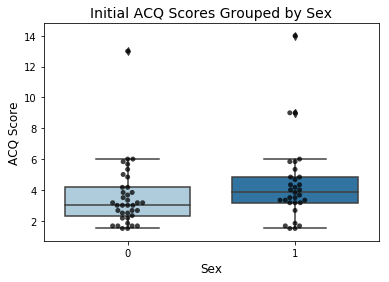

In [29]:
bp = sns.boxplot(y='acq', x='sex', 
                 data=temp, 
                 width=0.75,
                 palette="Paired")

bp =sns.swarmplot(y='acq', x='sex',
              data=temp, 
              color='black',
              alpha=0.75)

bp.axes.set_title("Initial ACQ Scores Grouped by Sex",
                    fontsize=14)
 
bp.set_xlabel("Sex", 
                fontsize=12)
 
bp.set_ylabel("ACQ Score",
                fontsize=12)
#If only we knew what these meant


#Equal distribution so no inferences can be made with sex and ACQ

Text(0,0.5,'ACQ Score')

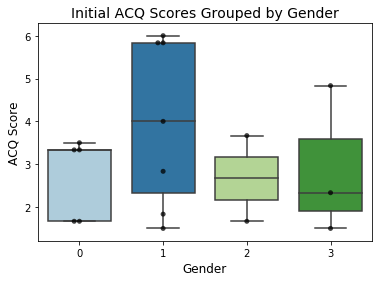

In [30]:
bp = sns.boxplot(y='acq', x='gender', 
                 data=temp2, 
                 width=0.75,
                 palette="Paired")

bp =sns.swarmplot(y='acq', x='gender',
              data=temp2, 
              color='black',
              alpha=0.75)

bp.axes.set_title("Initial ACQ Scores Grouped by Gender",
                    fontsize=14)
 
bp.set_xlabel("Gender", 
                fontsize=12)
 
bp.set_ylabel("ACQ Score",
                fontsize=12)
#If only we knew what these meant

#If only we knew what these meant
#Gender 1 and 2 seem to have more variation compared to that of 0 and 3

In [31]:
sheets = ['Screen', 'Demographics', 'Complete Demo','Demographics(1)', 
          'medhistory', 'medhistory(1)', 'ACQ']
data_df_dict = {}
for sheet in sheets:
    data_df_tmp = pd.read_excel('Asthma study 2019 (2).xlsx', 
                                sheet_name=sheet, 
                                index_col=0)
    data_df_dict[sheet] = data_df_tmp

In [32]:
med = pd.DataFrame(data_df_dict['medhistory(1)']).reset_index()
med.rename(columns={'id ':'id'}, inplace=True)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

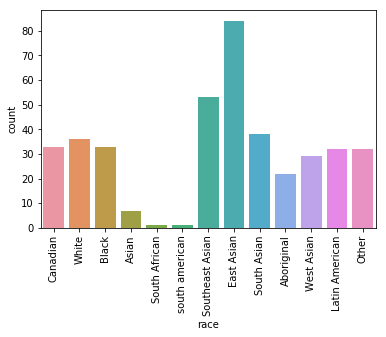

In [33]:
complete_demo = pd.DataFrame(data_df_dict['Complete Demo']).reset_index()
sns.countplot(x='race', data=complete_demo)
plt.xticks(rotation = 90)

In [44]:
complete_demo_id = complete_demo['id'].tolist()
#print(len(set(complete_demo_id) & set(screen_id)))
complete_demo_screen = complete_demo.merge(screen_filter, how = 'inner', on = 'id')
complete_demo_screen = complete_demo_screen.drop(columns=['infconsent', '18+', 'eos300', 'eos150', 'sputum'])
complete_demo_screen = complete_demo_screen.merge(acq_1, how = 'inner', on = 'id')

In [45]:
complete_demo_screen.columns

Index(['id', 'age', 'race', 'work', 'retire', 'disab', 'date_x', 'clinic',
       'acq-screen', 'result', 'date_y', 'acq', 'date2', 'acq2', 'date3',
       'acq3', 'date4', 'acq4', 'date5', 'acq5'],
      dtype='object')

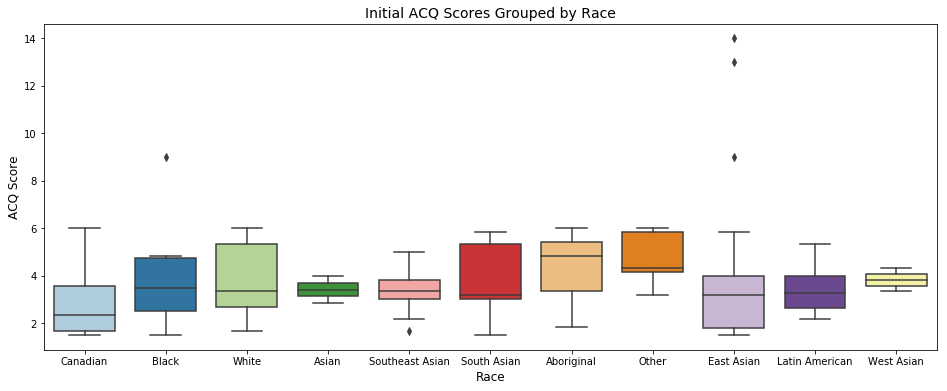

In [46]:
plt.figure(figsize=(16, 6))

bp = sns.boxplot(y='acq', x='race', 
                 data=complete_demo_screen, 
                 width=0.75,
                 palette="Paired")

bp.axes.set_title("Initial ACQ Scores Grouped by Race",
                    fontsize=14)
 
bp.set_xlabel("Race", 
                fontsize=12)
 
bp.set_ylabel("ACQ Score",
                fontsize=12)
 
bp.tick_params(labelsize=10)
#Makes sense that the most variation is under Canadian since that could be any race since Canadian is a nationality
#If Asia was grouped together it would make up a majority of the races - what does that say about asians and asthma?

#"In 2010, the prevalence of asthma in South Asians residing in Ontario was similar to that of the 
#general population (12.1% versus 12.4%), and was increasing at a faster rate than in the general 
#population (0.51%/year versus 0.34%/year). Compared with the general population, the South Asian 
#population had fewer emergency department visits for asthma, whereas the asthma-related hospitalization 
#rate was greatest among the South Asian population (0.45 per 100 person-years).
#The burden of asthma among South Asians in Ontario is increasing and warrants further investigation to 
#determine the reasons for this rise."

#Citation: The burden of asthma among South Asian and Chinese populations residing in Ontario

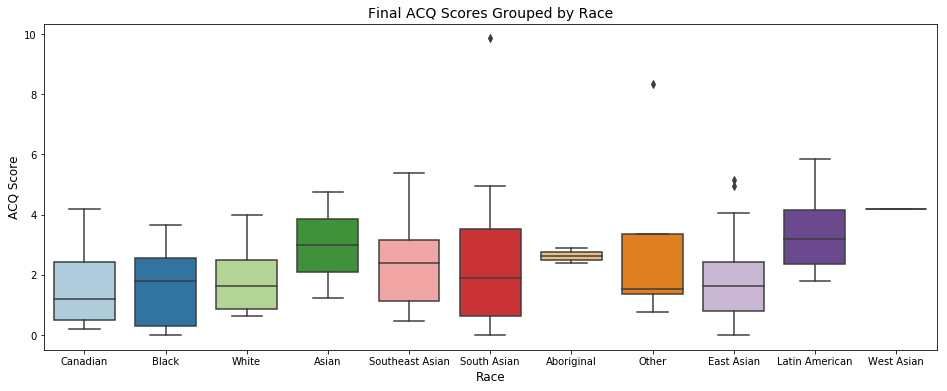

In [47]:
plt.figure(figsize=(16, 6))

bp = sns.boxplot(y='acq5', x='race', 
                 data=complete_demo_screen, 
                 width=0.75,
                 palette="Paired")

bp.axes.set_title("Final ACQ Scores Grouped by Race",
                    fontsize=14)
 
bp.set_xlabel("Race", 
                fontsize=12)
 
bp.set_ylabel("ACQ Score",
                fontsize=12)
 
bp.tick_params(labelsize=10)
#he score for the aboriginals decreased immensely

In [52]:
#Race and Smoking association with Asthma
med_id = med['id'].tolist()
#print(len(set(med_id) & set(complete_demo_id)))
med = med.round({'smoking': 0, 'polyps': 0, 'vaccine': 0, 'arthritis': 0, 'CVD': 0, 'Prev-biologic': 0, 'allergy': 0})
demo_med = complete_demo_screen.merge(med, how = 'inner', on = 'id')
demo_med.columns

Index(['id', 'age', 'race', 'work', 'retire', 'disab', 'date_x', 'clinic',
       'acq-screen', 'result', 'date_y', 'acq', 'date2', 'acq2', 'date3',
       'acq3', 'date4', 'acq4', 'date5', 'acq5', 'assess', 'smoking', 'polyps',
       'vaccine', 'arthritis', 'CVD', 'Prev-biologic', 'allergy', 'weight',
       'height'],
      dtype='object')

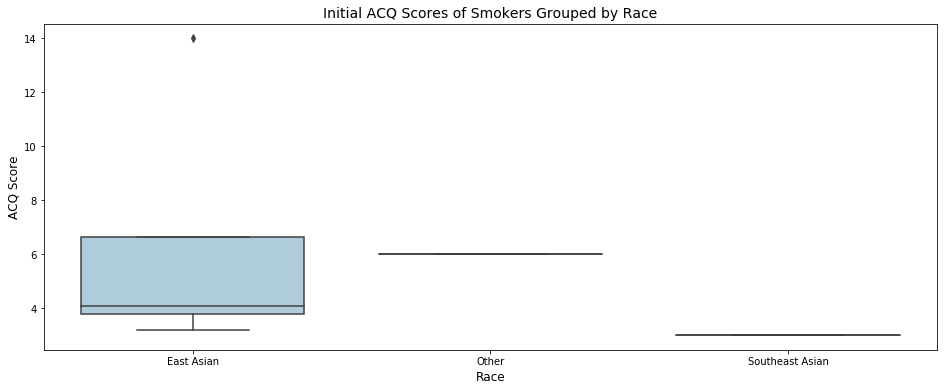

In [54]:
#Smokers - ACQ
smokers =  demo_med['smoking']==1
smokers_df = demo_med[smokers]
smokers_df.race.value_counts()
#Ast Asian, South Asian have decent counts for smoking, combined with previous look at ACQ 

plt.figure(figsize=(16, 6))

bp = sns.boxplot(y='acq', x='race', 
                 data=smokers_df, 
                 width=0.75,
                 palette="Paired")

bp.axes.set_title("Initial ACQ Scores of Smokers Grouped by Race",
                    fontsize=14)
 
bp.set_xlabel("Race", 
                fontsize=12)
 
bp.set_ylabel("ACQ Score",
                fontsize=12)
 
bp.tick_params(labelsize=10)

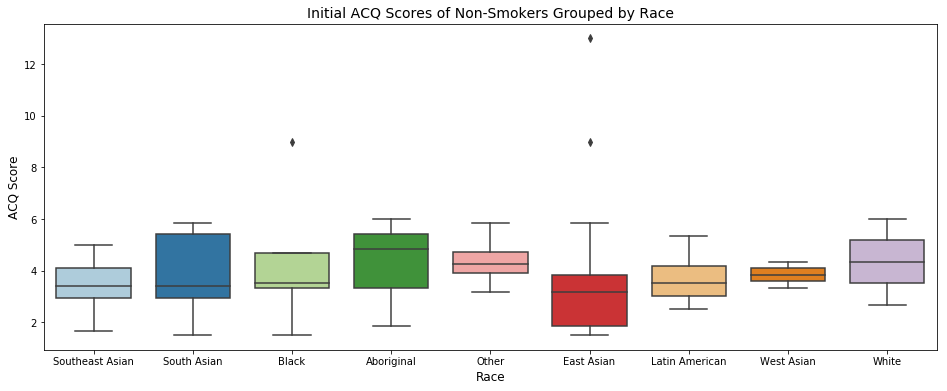

In [55]:
#Non-Smokers - ACQ
non_smokers =  demo_med['smoking']==0
non_smokers_df = demo_med[non_smokers]
non_smokers_df.race.value_counts()
#Ast Asian, South Asian have decent counts for smoking, combined with previous look at ACQ 

plt.figure(figsize=(16, 6))

bp = sns.boxplot(y='acq', x='race', 
                 data=non_smokers_df, 
                 width=0.75,
                 palette="Paired")

bp.axes.set_title("Initial ACQ Scores of Non-Smokers Grouped by Race",
                    fontsize=14)
 
bp.set_xlabel("Race", 
                fontsize=12)
 
bp.set_ylabel("ACQ Score",
                fontsize=12)
 
bp.tick_params(labelsize=10)

In [57]:
#Threshold is >1.5 good 
#Initial ACQ
above_threshold = demo_med[demo_med['acq'] > 1.500]
below_threshold = demo_med[demo_med['acq'] < 1.500]
#Final ACQ
above_threshold_end = demo_med[demo_med['acq5'] > 1.500]
below_threshold_end = demo_med[demo_med['acq5'] < 1.500]

In [58]:
above_threshold['acq'].count()

64

In [59]:
below_threshold['acq'].count()

0

In [60]:
above_threshold_end['acq5'].count()

39

In [61]:
below_threshold_end['acq5'].count()
#Improvement in ACQ at the final assessment

23

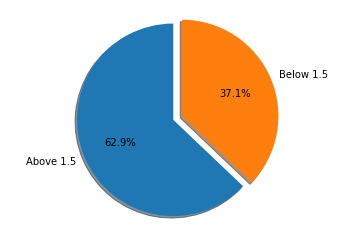

In [62]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Above 1.5', 'Below 1.5'
sizes = [62.90, 37.1]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
#The patients went from 100% being above 1.5 to nearly a third being below at the 5th assesssment

East Asian         9
Southeast Asian    4
Latin American     3
South Asian        3
White              1
Other              1
West Asian         1
Black              1
Name: race, dtype: int64

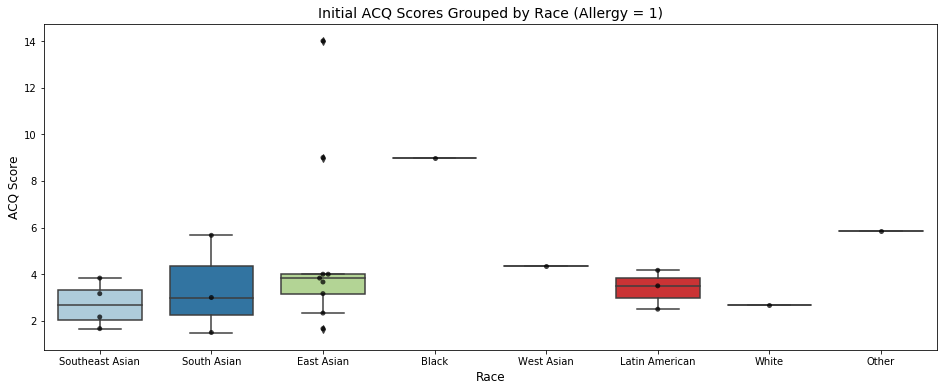

In [63]:
allergy =  demo_med['allergy']==1
allergy_df = demo_med[allergy]
plt.figure(figsize=(16, 6))

bp = sns.boxplot(y='acq', x='race', 
                 data=allergy_df, 
                 width=0.75,
                 palette="Paired")

bp =sns.swarmplot(y='acq', x='race',
              data=allergy_df, 
              color='black',
              alpha=0.75)

bp.axes.set_title("Initial ACQ Scores Grouped by Race (Allergy = 1)",
                    fontsize=14)
 
bp.set_xlabel("Race", 
                fontsize=12)
 
bp.set_ylabel("ACQ Score",
                fontsize=12)
 
bp.tick_params(labelsize=10)



allergy_df.race.value_counts()
#A lot of east and south east asians have allergies 

East Asian         9
Southeast Asian    4
Latin American     3
South Asian        3
White              1
Other              1
West Asian         1
Black              1
Name: race, dtype: int64

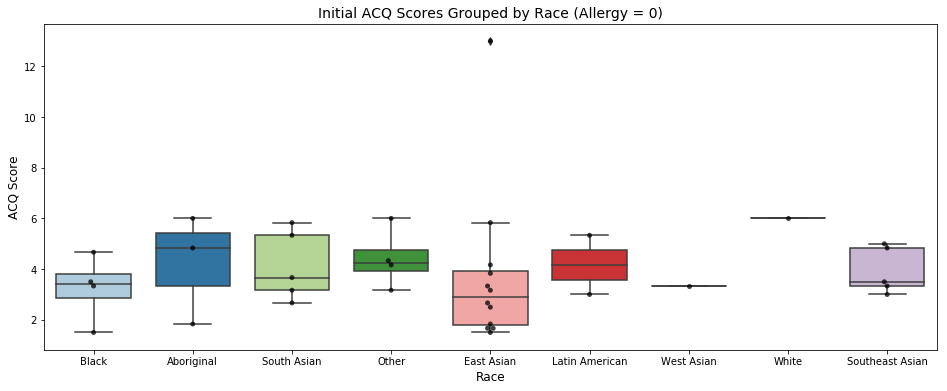

In [64]:
no_allergy =  demo_med['allergy']==0
no_allergy_df = demo_med[no_allergy]
plt.figure(figsize=(16, 6))

bp = sns.boxplot(y='acq', x='race', 
                 data=no_allergy_df, 
                 width=0.75,
                 palette="Paired")

bp =sns.swarmplot(y='acq', x='race',
              data=no_allergy_df, 
              color='black',
              alpha=0.75)

bp.axes.set_title("Initial ACQ Scores Grouped by Race (Allergy = 0)",
                    fontsize=14)
 
bp.set_xlabel("Race", 
                fontsize=12)
 
bp.set_ylabel("ACQ Score",
                fontsize=12)
 
bp.tick_params(labelsize=10)



allergy_df.race.value_counts()
#A lot of east and south east asians have allergies 

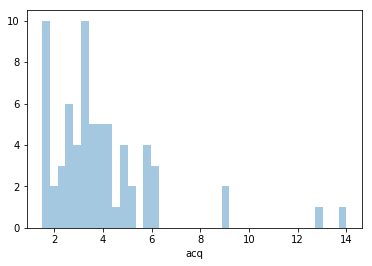

In [65]:
sns.distplot(demo_med.acq.dropna(), kde=False, bins = 39);
#The outliers that are greater than 7 can be visualized, a majority of the acq scores are in the 1-6 range

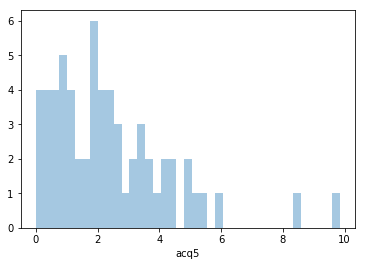

In [66]:
sns.distplot(demo_med.acq5.dropna(), kde=False, bins = 39);
#At the end there are still some outliers howevermostly under 6 and even some below the 1.5 threshold level

/usr/lib/python3/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


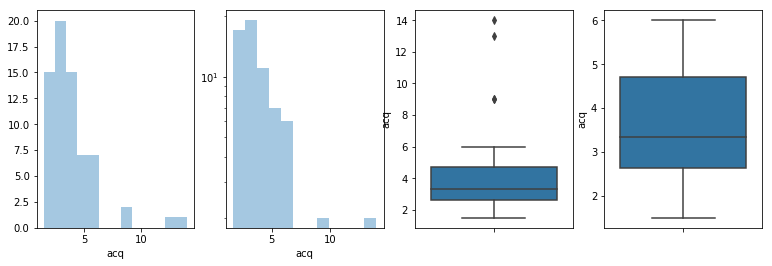

In [67]:
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(demo_med.acq.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(demo_med.acq.dropna()[demo_med.acq > 1.5], kde=False, ax=axs[1])
sns.boxplot(demo_med.acq, ax=axs[2], orient = 'v')
sns.boxplot(demo_med.acq, ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')
#Shows the range of ACQ without the outliers

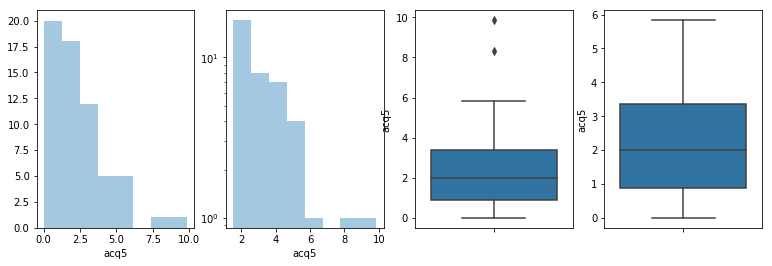

In [68]:
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(demo_med.acq5.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(demo_med.acq5.dropna()[demo_med.acq5 > 1.5], kde=False, ax=axs[1])
sns.boxplot(demo_med.acq5, ax=axs[2], orient = 'v')
sns.boxplot(demo_med.acq5, ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')
#Shows the range of ACQ without the outliers + the improvement of the ACQ at the 5th assessment.

/home/akaash/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


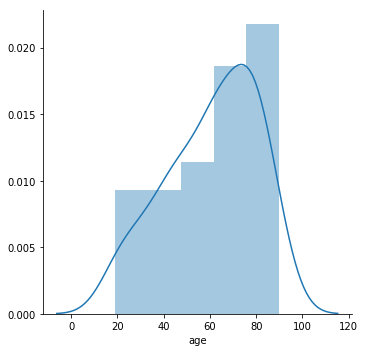

In [69]:
sns.FacetGrid(demo_med, size = 5).map(sns.distplot, "age").add_legend()
#Majority of patients are elders